## Libraries 

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.metrics import mean_squared_error


## Reading & Exploring Data

In [3]:
data_frame = pd.read_csv('machine.data',header=None)
cols = ['vendor','model','myct','mmin','mmax','cach','chmin','chmax','prp','erp']
data_frame.columns = cols
data_frame.head(2)

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


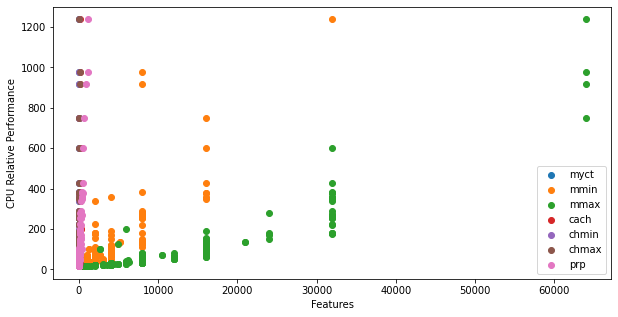

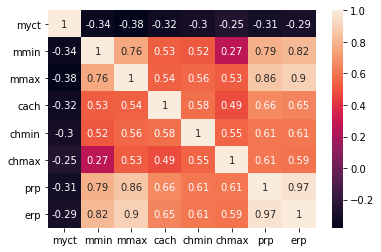

In [4]:
plt.figure(figsize=(10,5))
target = 'erp'
# features = ['prp','mmin','mmax','chmin']    #see last section. used 4 features here
features = cols[2:9]      #comment this and uncomment above for testing last section
for feature in features:
    plt.scatter(x=data_frame[feature],y=data_frame[target],label=feature,marker='o')
plt.xlabel("Features")
plt.ylabel("CPU Relative Performance")
plt.legend()
plt.show()
sns.heatmap(data=data_frame.corr(),annot=True)
plt.show()

## Separating Training & Test Data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data_frame[features],data_frame[target],
                                    test_size=0.35,random_state=40)

## Regression with Random Forest

In [6]:
regressor = RandomForestRegressor(random_state=40,oob_score=True)
regressor.fit(x_train,y_train)


RandomForestRegressor(oob_score=True, random_state=40)

In [7]:
# plt.figure(figsize=(20,20))
# tree.plot_tree(regressor.estimators_[6],feature_names=features,class_names=target,filled=True)
# plt.show()
# print(len(regressor.estimators_))

In [8]:
results = regressor.predict(x_test)
# results

## Model Accuracy

In [9]:
# using mse and its square-root
mse = mean_squared_error(y_test,results)
np.sqrt(mse)

19.118577600320048

In [10]:
# using absolute errors and mean absolute errors
absolute_errors = abs(results-y_test) #returns the array of errors
avg_abs_error = round(np.mean(absolute_errors))
avg_abs_error

12

In [11]:
# percentage of error using absolute errors
error_percentage = (absolute_errors/y_test) * 100
avg_error_percentage = np.mean(error_percentage)
print("Accuracy : " , round(100-avg_error_percentage), "%")

Accuracy :  89 %


## Features Importances

In [12]:
importances = regressor.feature_importances_
for index in range(len(importances)):
    print(features[index], ":",round(importances[index],3))

myct : 0.01
mmin : 0.025
mmax : 0.327
cach : 0.009
chmin : 0.022
chmax : 0.011
prp : 0.595


## Making Random Forest with Important Features only

In [13]:
# using prp,mmax,chmin,mmin only
# did it above... accuracy decreased by 2% 
# we can use less features and apply filters 
# less working for computer

## Plotting Predictions vs Actual 

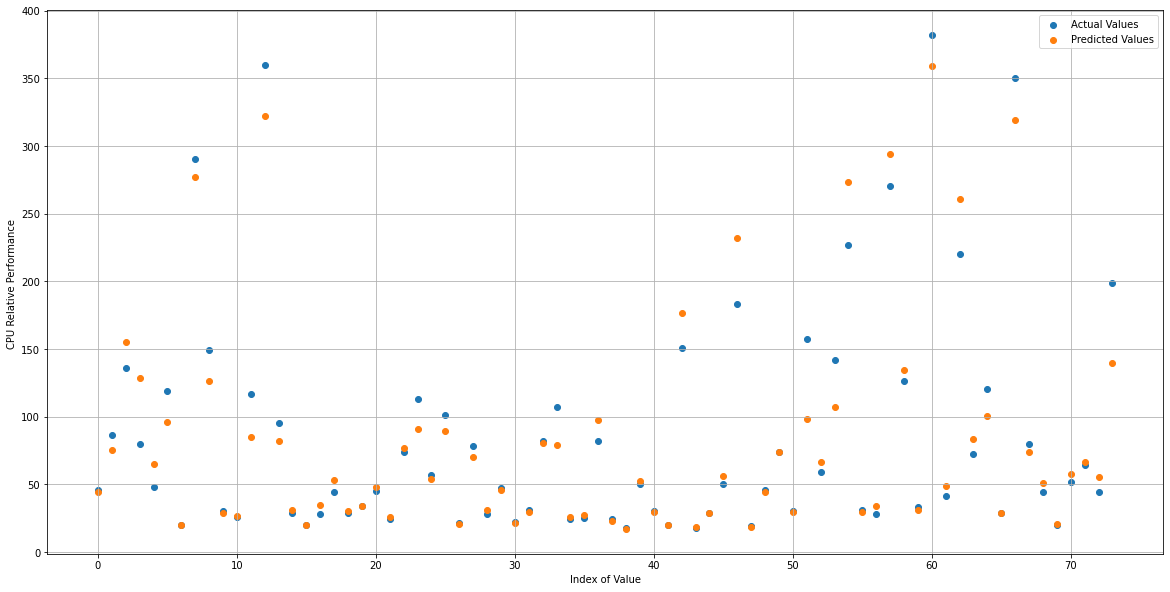

In [14]:
indexes = []   # this is as a dummy x-axis
for i in range(len(y_test)):
    indexes.append(i)
plt.figure(figsize=(20,10))
plt.scatter(indexes,y_test,label="Actual Values")
plt.scatter(indexes,results,label="Predicted Values")
plt.xlabel("Index of Value")
plt.ylabel("CPU Relative Performance ")
plt.legend()
plt.grid(True)
plt.show()